# 3. Machine Learning for Classification
We'll une logistic regression to predict churn
## 3.1 Chrun prediction project
* Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
* File: https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
## 3.2 Data preparation
* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
import os
filename = 'data-week-3.csv'
if not os.path.exists(filename):
    os.system(f'wget {data_url} -O data-week-3.csv')
    print(f"Le fichier {filename} a été téléchargé avec succès.")
else:
    # Si le fichier existe déjà, imprimez un message
    print(f"Le fichier {filename} existe déjà.")

Le fichier data-week-3.csv existe déjà.


In [4]:
df = pd.read_csv(filename)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # edit columns names
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_') # edit content of column
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


totalcharges a certain na, il faut les remplacer pas des 0

In [10]:
df.totalcharges = df.totalcharges.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [11]:
df.churn.unique()

array(['no', 'yes'], dtype=object)

In [12]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## 3.3 Setting up the validation framework
* Perform the train/validation/test split with Scikit-Learn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Allow to see de docstring
train_test_split?

Nous allons prendre 20% du dataset pour les tests, les 80% restant seront pour le train

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
len(df_full_train), len(df_test)

(5634, 1409)

Du train set, nous allons prendre 25% pour la validation et laisser le reste pour le train. Car on veut une répartition du dataset en 60/20/20. Car $\frac{20\%}{80\%}=\frac{1}{4}=25\%$ 

In [17]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [18]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [19]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [20]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [21]:
df_train.drop('churn', axis=1, inplace=True)
df_val.drop('churn', axis=1, inplace=True)
df_test.drop('churn', axis=1, inplace=True)

## 3.4 EDA
* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [22]:
df_full_train.reset_index(drop=True, inplace=True)

In [23]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [24]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

0.269968 est ce que l'on peut appeler le "churn rate"

In [25]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

ça donne le même résultat et c'est normal (réflexion mathématique)

In [26]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [27]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [28]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [29]:
categorical = ['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [30]:
df_full_train[categorical].nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable
* Churn rate
* Risk ratio
* Mutual information - later

Churn rate

In [31]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [32]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [33]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [34]:
global_churn_rate

0.26996805111821087

On constate que le genre de la personne n'influe pas vraiment avec les désabonnements (churn)

In [35]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [36]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

Difference between **global_churn_rate** and **churn_group**:
if $global\_churn\_rate - churn\_group \lt 0 \rightarrow$ More likely to churn
if $global\_churn\_rate - churn\_group \gt 0 \rightarrow$ Less likely to churn
absolute terms

In [37]:
global_churn_rate - churn_partner

0.06493474245795922

People who have partner have 6% less likely to churn

In [38]:
global_churn_rate - churn_no_partner

-0.05984095297455855

People who don't have partner have 6% more likely to churn

Risk ratio
$Risk = \frac{group}{global}$
if $\frac{group}{global} \gt 1 \rightarrow$ More likely to churn
if $\frac{group}{global} \lt 1 \rightarrow$ Less likely to churn
relative terms

In [39]:
churn_no_partner / global_churn_rate

1.2216593879412643

People who don't partner, churn rate: 22% higher
High risk

In [40]:
churn_partner / global_churn_rate

0.7594724924338315

People who have partner, churn rate: 24% lower
Low risk

```
SELECT
    gender
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [41]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [42]:
df_full_train.groupby('gender').churn.agg(['mean'])

,mean
gender,
female,0.276824
male,0.263214


In [43]:
from IPython.display import display

In [44]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

customerid


,mean,count,diff,risk
customerid,,,,
0002-orfbo,0.0,1,-0.269968,0.000000
0004-tlhlj,1.0,1,0.730032,3.704142
0011-igkff,1.0,1,0.730032,3.704142
0013-exchz,1.0,1,0.730032,3.704142
0013-mhzwf,0.0,1,-0.269968,0.000000
...,...,...,...,...
9987-lutyd,0.0,1,-0.269968,0.000000
9992-rramn,1.0,1,0.730032,3.704142
9992-ujoel,0.0,1,-0.269968,0.000000




gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another
* https://en.wikipedia.org/wiki/Mutual_information

In [45]:
from sklearn.metrics import mutual_info_score

In [46]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [47]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [48]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [49]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [50]:
df_full_train[categorical].apply(mutual_info_churn_score)

customerid          0.583227
gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [51]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False) # Sorting to most important to less important 

customerid          0.583227
contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Feature importance: Correlation
How about numerical columns?
* Correlation coefficient

Explanation:
$y \in \{0,1\}$
$x \in \mathbb{R}$
$x: $ Tenure 0-72
$y: $ Churn {0,1}

When positive correlation:
* More tenure $\rightarrow$ Higher churn

When negative correlation:
* More tenure $\rightarrow$ Less churn

When zero correlation:
* No effect on churn

In [52]:
df_full_train.tenure.max()

72

In [53]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [54]:
df_full_train[numerical].corrwith(df_full_train.churn).sort_values()

tenure           -0.351885
totalcharges     -0.196353
monthlycharges    0.196805
dtype: float64

In [55]:
df_full_train[df_full_train.tenure <= 2].churn.mean() # ceux qui sont là depuis 2 mois ou moins

0.5953420669577875

In [56]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [57]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

Les chiffres montrent que plus les gens restent, moins ils ont tendence à se désabonner (négative correelation)

In [58]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [59]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [60]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

Les chiffres montrent que plus les charges ($) sont élevées, plus les gens partent (positive correlation)

# 3.8 One-hot encoding
* Use Scikit-Learn to encode categorical features

| Gender | Contract |
|-----|----------|
| Female | 2 years  |
| Male | 1 year   |
| Male | month    |
| Male | 1 year   |
| Female | month    |

| Gender |   |       |      | Contract |
|--------|---|-------|------|----------|
| M      | F | Month | Year | 2 Years  |
| 0      | 1 | 0     | 0    | 1        |
| 1      | 0 | 0     | 1    | 0        |
| 1      | 0 | 1     | 0    | 0        |
| 1      | 0 | 0     | 1    | 0        |
| 0      | 1 | 1     | 0    | 0        |


In [61]:
from sklearn.feature_extraction import DictVectorizer

In [70]:
df_full_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict(orient='records')

[{'gender': 'male', 'contract': 'two_year', 'tenure': 12},
 {'gender': 'female', 'contract': 'one_year', 'tenure': 42},
 {'gender': 'male', 'contract': 'two_year', 'tenure': 71},
 {'gender': 'male', 'contract': 'one_year', 'tenure': 71},
 {'gender': 'male', 'contract': 'one_year', 'tenure': 30},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 9},
 {'gender': 'male', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 28},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 6},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 47}]

In [71]:
dicts = df_full_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict(orient='records')

In [72]:
dv = DictVectorizer()

In [73]:
dv.fit(dicts)

DictVectorizer()

In [74]:
dv.transform(dicts)

<10x6 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

Ici on ne veut pas une matrice "Sparse"

In [75]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.transform(dicts)

array([[ 0.,  0.,  1.,  0.,  1., 12.],
       [ 0.,  1.,  0.,  1.,  0., 42.],
       [ 0.,  0.,  1.,  0.,  1., 71.],
       [ 0.,  1.,  0.,  0.,  1., 71.],
       [ 0.,  1.,  0.,  0.,  1., 30.],
       [ 1.,  0.,  0.,  1.,  0.,  9.],
       [ 0.,  0.,  1.,  0.,  1., 72.],
       [ 1.,  0.,  0.,  0.,  1., 28.],
       [ 1.,  0.,  0.,  0.,  1.,  6.],
       [ 1.,  0.,  0.,  1.,  0., 47.]])

In [76]:
dv.get_feature_names_out() # les correspondances avec le DF ci-dessus

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [86]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [88]:
train_dicts[0]

{'customerid': '8015-ihcgw',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [85]:
df_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

In [89]:
dv = DictVectorizer(sparse=False)

In [97]:
X_train = dv.fit_transform(train_dicts)

In [95]:
list(dv.transform(train_dicts[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [98]:
X_train.shape

(4225, 4270)

In [99]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [100]:
X_val = dv.transform(val_dicts)

# 3.9 Logistic regression
* Binary classification
* Linear regression

In [102]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [103]:
z = np.linspace(-5,5,51)

In [104]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

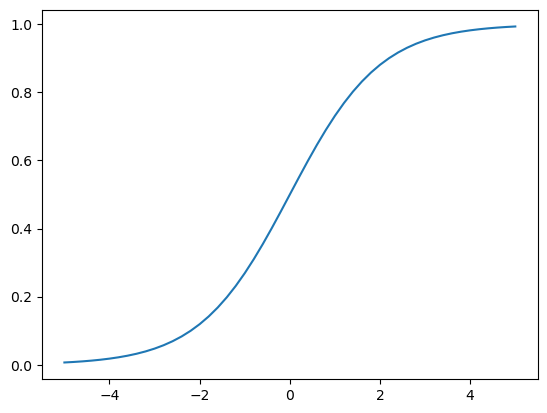

In [105]:
plt.plot(z, sigmoid(z))

Valeur négative à gauche de la sigmoid, positif de l'autre

In [108]:
#exemples
print(sigmoid(100))
print(sigmoid(1000))
print(sigmoid(10000))
print(sigmoid(10000000))

1.0
1.0
1.0
1.0


In [109]:
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return result

In [110]:
def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        result = sigmoid(score)
    return result

# 3.10 Training logistic regression with Scikit-Learn
* Train a model with Scikit-Learn
* Apply it ti the validation dataset
Calculate the accuracy

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/wm18vw/miniconda3/envs/machineLearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
model.intercept_[0] # bias

-0.11066198439473578

In [118]:
model.coef_[0].round(3) # weights

array([ 0.541, -0.184, -0.467, ..., -0.226, -0.07 ,  0.   ])

In [122]:
model.predict(X_train) # churn or not churn prediction
#This is "Hard prediction"

array([0, 1, 1, ..., 1, 0, 1])

In [126]:
model.predict_proba(X_train) # soft prediction
# the result is not 0 or 1, but a score
# two classes, first negative class, second positive class
# second column = probability of churning

array([[0.90851642, 0.09148358],
       [0.33001783, 0.66998217],
       [0.37419707, 0.62580293],
       ...,
       [0.43656689, 0.56343311],
       [0.96090798, 0.03909202],
       [0.30300596, 0.69699404]])

In [128]:
y_pred = model.predict_proba(X_val)[:,1] # soft prediction

In [130]:
churn_decision = (y_pred >= 0.5)

In [132]:
df_val[churn_decision].customerid # liste des clients qui ont un risque de se désabonner. On pourrait leur envoyer une promotion...

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 320, dtype: object

In [133]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [134]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [135]:
(y_val == churn_decision).mean()

0.7984386089425124

Nos prédictions sont correctes à 80%

In [136]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [138]:
df_pred

,probability,prediction,actual
0,0.008446,0,0
1,0.213149,0,0
2,0.215468,0,0
3,0.527481,1,1
4,0.212925,0,0
...,...,...,...
1404,0.341294,0,0
1405,0.038491,0,1
1406,0.134108,0,0
1407,0.801045,1,1


In [139]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [141]:
df_pred

,probability,prediction,actual,correct
0,0.008446,0,0,True
1,0.213149,0,0,True
2,0.215468,0,0,True
3,0.527481,1,1,True
4,0.212925,0,0,True
...,...,...,...,...
1404,0.341294,0,0,True
1405,0.038491,0,1,False
1406,0.134108,0,0,True
1407,0.801045,1,1,True


In [142]:
df_pred.correct.mean()

0.7984386089425124

# 3.11 Model interpretation
* Look at the coefficients
* Train a smaller model with fewer features

In [144]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.541,
 'contract=one_year': -0.184,
 'contract=two_year': -0.467,
 'customerid=0002-orfbo': -0.005,
 'customerid=0011-igkff': 0.006,
 'customerid=0013-exchz': 0.007,
 'customerid=0013-mhzwf': -0.006,
 'customerid=0013-smeoe': -0.002,
 'customerid=0014-bmaqu': -0.001,
 'customerid=0015-uocoj': -0.007,
 'customerid=0017-dinoc': -0.0,
 'customerid=0019-efaep': -0.001,
 'customerid=0020-inwck': -0.002,
 'customerid=0020-jdnxp': -0.001,
 'customerid=0021-ikxgc': -0.013,
 'customerid=0023-uyupn': -0.0,
 'customerid=0023-xuopt': 0.007,
 'customerid=0030-fnxpp': -0.003,
 'customerid=0031-pvlzi': 0.014,
 'customerid=0036-ihmot': -0.002,
 'customerid=0042-rlhyp': -0.0,
 'customerid=0048-lumls': -0.004,
 'customerid=0048-pihnl': -0.0,
 'customerid=0052-dckon': -0.002,
 'customerid=0056-epfbg': -0.002,
 'customerid=0057-qbuqh': -0.0,
 'customerid=0071-ndafp': -0.001,
 'customerid=0078-xzmht': -0.001,
 'customerid=0080-emyvy': -0.004,
 'customerid=0082-oqiqy': -0.007,
 

In [145]:
small = ['contract', 'tenure', 'monthlycharges']

In [147]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [148]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [150]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [151]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [152]:
X_train_small = dv_small.transform(dicts_train_small)

In [153]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [156]:
w0 = model_small.intercept_[0]
w0

-2.4767756624772455

In [157]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [158]:
dict(zip(dv_small.get_feature_names_out(), w.round(3))) # our w

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [166]:
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [167]:
sigmoid(_) # _ stand for last output

0.41824062315816374

In [168]:
sigmoid(-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036))

0.41824062315816374

In [169]:
-2.47 + 0.97 + 60 * 0.027 + 1 * (-0.036)

0.08399999999999966

In [170]:
sigmoid(_) # _ stand for last output


0.5209876607065322

In [174]:
# for 24 month:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [175]:
sigmoid(_)

0.030090303318277657

# 3.12 Using the model

In [176]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

# 3.12 @ 1:36